In [2]:
import pandas as pd

data = pd.read_excel("water_scarcity_data.xlsx")

In [3]:
data.head()

,username,No Response,Name,No Response.1,Age of respondent,No Response.2,Gender,No Response.3,Marital status,No Response.4,...,Take a picture of the surrounding?.2,No Response.492,Take a picture of the surrounding?.3,No Response.493,Make a short clip of the surrounding?,No Response.494,Case study area,No Response.495,Block/Area,No Response.496
0,hussain110,No Response,Ali,No Response,21- 25,No Response,Male,No Response,Single,No Response,...,No Response,No Response,No Response,No Response,No Response,No Response,Gulistan e jauhar,No Response,Pehelwan goth block 9,No Response
1,muhammadfaeezneduet,No Response,No Response,No Response,46 - 50,No Response,Female,No Response,Married,No Response,...,No Response,No Response,No Response,No Response,No Response,No Response,Gulistan e jauhar,No Response,Pehalwan Goth,No Response
2,muhammad_mujtaba,No Response,Shabana,No Response,41 - 45,No Response,Female,No Response,Married,No Response,...,No Response,No Response,No Response,No Response,No Response,No Response,Garden area,No Response,Madina appartment,No Response
3,hussain110,No Response,No Response,No Response,46 - 50,No Response,Male,No Response,Married,No Response,...,No Response,No Response,No Response,No Response,No Response,No Response,Gulistan e jauhar,No Response,Pehelwan goth block 9,No Response
4,mairamumtaz029,No Response,Nimra,No Response,36 - 40,No Response,Female,No Response,Married,No Response,...,No Response,No Response,No Response,No Response,No Response,No Response,Gulistan e jauhar,No Response,Bhittaiabad,No Response


In [4]:
even_columns_indices = list(range(1, len(data.columns), 2))
data = data.drop(data.columns[even_columns_indices], axis=1)


In [5]:
data.head()

,username,Name,Age of respondent,Gender,Marital status,Ethnicity,Religion,Highest level of education,Occupation,What is your estimated monthly household income?,...,"If no, did the community members themselves reached out to the government ?","If yes, what was there reponse?","If no, why did they not?",Take a picture of the surrounding?,Take a picture of the surrounding?.1,Take a picture of the surrounding?.2,Take a picture of the surrounding?.3,Make a short clip of the surrounding?,Case study area,Block/Area
0,hussain110,Ali,21- 25,Male,Single,Urdu speaking,Islam,Matric,Mobile repairing,Less than 25000,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,Gulistan e jauhar,Pehelwan goth block 9
1,muhammadfaeezneduet,No Response,46 - 50,Female,Married,Punjabi,Christian,illiteracy,Maid,Less than 25000,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,Gulistan e jauhar,Pehalwan Goth
2,muhammad_mujtaba,Shabana,41 - 45,Female,Married,Memon,Islam,Matric,House wife,46000 - 55000,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,Garden area,Madina appartment
3,hussain110,No Response,46 - 50,Male,Married,Punjabi,Christian,illiteracy,Worker in Bahria university,46000 - 55000,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,Gulistan e jauhar,Pehelwan goth block 9
4,mairamumtaz029,Nimra,36 - 40,Female,Married,Pashto,Islam,illiteracy,Tailoring,Less than 25000,...,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,Gulistan e jauhar,Bhittaiabad


In [ ]:
data[]

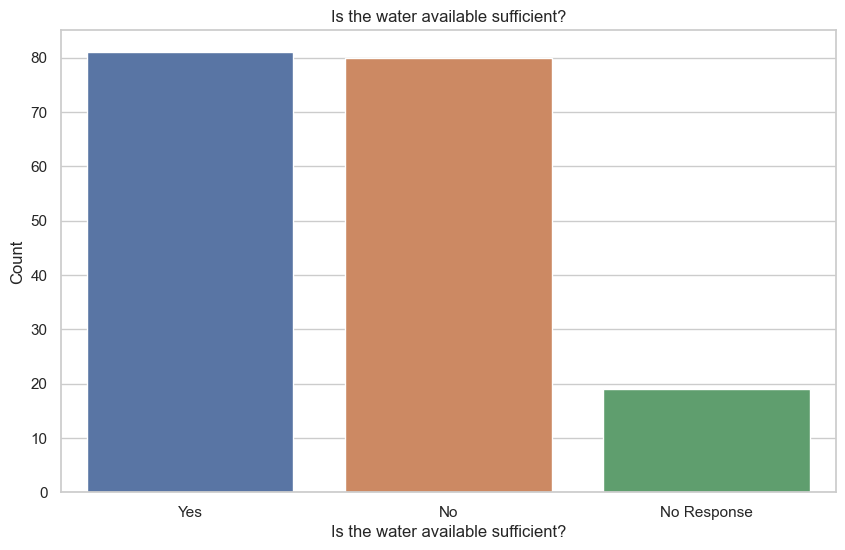

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the bar chart
ax = sns.barplot(x=data['Is the water available sufficient?'].value_counts().index,
                y=data['Is the water available sufficient?'].value_counts().values)

# Customize the plot
ax.set(ylabel="Count")
ax.set_xticklabels(['Yes', 'No', 'No Response']) 
plt.title("Is the water available sufficient?")

# Show the plot
plt.show()

### Converting dataframe into csv file

In [17]:
data.to_csv('waterScarcityData.csv', index=False)

## Converting Data types

In [7]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns and encode non-numeric columns
for column in data.columns:
    if data[column].dtype == 'object':
        if len(data[column].unique()) <= 2:
            # Use label encoding for binary categorical columns
            label_encoder = LabelEncoder()
            data[column] = label_encoder.fit_transform(data[column])
        else:
            # Use one-hot encoding for categorical columns with more than two categories
            data = pd.get_dummies(data, columns=[column], prefix=column)


## Corelation Matrix

In [8]:
# Calculate Pearson correlation coefficient for all columns
correlation_matrix = data.corr()

# Print the correlation matrix
correlation_matrix


,Gender,House Area (Sq yds.),Do you have a KW&SB line connection?,If other,If other.1,"If Yes, what are those methods/measures?/other",If other.2,What are the difficulties faced by children in the time of water shortage? /Fetching water,"If Yes, what kind of problems have been faced? check all that apply/Hepatitis","If Yes, what kind of problems have been faced? check all that apply/Typhoid",...,Block/Area_Sindh baloch cooperative housing society block 12,Block/Area_Sindh baloch cooperative society,Block/Area_Sindh baloch society block 12,"Block/Area_Sindh baloch, block 12",Block/Area_Sonehri Apartment,Block/Area_Sunny Castle Block 14,Block/Area_Sunny view apartments Block 14,Block/Area_block 14,Block/Area_sikandar Goth,Block/Area_sikander goth
Gender,1.000000,-0.093003,0.011469,0.088281,-0.034700,0.014702,NaN,0.115205,-0.079546,-0.079546,...,-0.103114,-0.103114,-0.034700,-0.146235,0.054179,0.054179,-0.103114,0.054179,-0.103114,0.054179
House Area (Sq yds.),-0.093003,1.000000,0.163214,-0.054337,0.250665,-0.168607,NaN,-0.134979,0.095288,0.095288,...,0.176751,0.176751,0.250665,0.250665,-0.027936,-0.014290,-0.027936,0.040293,-0.068873,-0.041582
Do you have a KW&SB line connection?,0.011469,0.163214,1.000000,-0.055877,0.045495,-0.682601,NaN,-0.584898,-0.124643,-0.124643,...,0.032080,0.032080,0.045495,0.045495,0.032080,0.032080,0.032080,0.032080,-0.174147,-0.174147
If other,0.088281,-0.054337,-0.055877,1.000000,0.013800,0.081859,NaN,0.095533,-0.037808,-0.037808,...,0.009731,0.009731,0.013800,-0.400200,0.009731,0.009731,0.009731,0.009731,0.009731,0.009731
If other.1,-0.034700,0.250665,0.045495,0.013800,1.000000,-0.066649,NaN,-0.077783,0.030783,0.030783,...,-0.007923,0.705129,-0.011236,-0.011236,-0.007923,-0.007923,-0.007923,-0.007923,-0.007923,-0.007923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Block/Area_Sunny Castle Block 14,0.054179,-0.014290,0.032080,0.009731,-0.007923,-0.046996,NaN,-0.054847,0.021706,0.021706,...,-0.005587,-0.005587,-0.007923,-0.007923,-0.005587,1.000000,-0.005587,-0.005587,-0.005587,-0.005587
Block/Area_Sunny view apartments Block 14,-0.103114,-0.027936,0.032080,0.009731,-0.007923,-0.046996,NaN,-0.054847,0.021706,0.021706,...,-0.005587,-0.005587,-0.007923,-0.007923,-0.005587,-0.005587,1.000000,-0.005587,-0.005587,-0.005587
Block/Area_block 14,0.054179,0.040293,0.032080,0.009731,-0.007923,-0.046996,NaN,-0.054847,0.021706,0.021706,...,-0.005587,-0.005587,-0.007923,-0.007923,-0.005587,-0.005587,-0.005587,1.000000,-0.005587,-0.005587
Block/Area_sikandar Goth,-0.103114,-0.068873,-0.174147,0.009731,-0.007923,0.118873,NaN,0.101858,0.021706,0.021706,...,-0.005587,-0.005587,-0.007923,-0.007923,-0.005587,-0.005587,-0.005587,-0.005587,1.000000,-0.005587


In [10]:
correlations = correlation_matrix['Is the water available sufficient?']

KeyError: 'Is the water available sufficient?'

In [12]:
data

,Gender,House Area (Sq yds.),Do you have a KW&SB line connection?,If other,If other.1,"If Yes, what are those methods/measures?/other",If other.2,What are the difficulties faced by children in the time of water shortage? /Fetching water,"If Yes, what kind of problems have been faced? check all that apply/Hepatitis","If Yes, what kind of problems have been faced? check all that apply/Typhoid",...,Block/Area_Sindh baloch cooperative housing society block 12,Block/Area_Sindh baloch cooperative society,Block/Area_Sindh baloch society block 12,"Block/Area_Sindh baloch, block 12",Block/Area_Sonehri Apartment,Block/Area_Sunny Castle Block 14,Block/Area_Sunny view apartments Block 14,Block/Area_block 14,Block/Area_sikandar Goth,Block/Area_sikander goth
0,1,80,1,1,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
1,0,80,1,1,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
2,0,100,1,1,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
3,1,60,1,1,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
4,0,60,1,1,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,80,1,1,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
176,1,120,1,1,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
177,1,600,1,1,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
178,1,100,1,1,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
